# Testing the model

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import platform

print("Python version:", platform.python_version())
print("Tensorflow version:", tf.__version__)

2024-04-16 23:14:27.951929: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Python version: 3.10.0
Tensorflow version: 2.16.1


In [2]:
model_name = "digits_recognition_cnn.h5"
loaded_model = tf.keras.models.load_model(model_name)

Load the `MNIST` dataset

In [6]:
# Load the dataset
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# Save image parameters to the constants that we will use later for data re-shaping and for model training.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

x_train_with_channels = x_train.reshape(
    x_train.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS
)
x_test_with_channels = x_test.reshape(
    x_test.shape[0], IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS
)

# Normalize the data
x_train_normalized = tf.keras.utils.normalize(x_train_with_channels, axis=1)
x_test_normalized = tf.keras.utils.normalize(x_test_with_channels, axis=1)

In [7]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [8]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [9]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.126349e-14,2.460274e-10,9.986830e-12,9.240588e-12,5.626111e-12,7.730246e-12,1.064217e-18,9.999999e-01,1.150660e-14,1.666665e-10
1,1.109358e-09,1.655856e-07,9.999998e-01,7.478997e-14,1.489741e-13,1.461870e-19,1.458824e-10,1.487537e-10,1.183175e-11,4.196809e-18
2,9.362284e-12,9.999991e-01,6.480756e-10,4.883898e-16,8.365844e-07,1.797118e-12,8.744533e-09,8.870130e-10,3.863335e-08,6.951059e-10
3,9.999999e-01,9.856081e-17,1.600753e-11,2.233414e-15,5.652156e-14,2.509756e-10,2.385192e-08,1.305080e-11,7.387436e-11,3.699879e-11
4,3.017660e-11,9.208615e-11,1.027651e-11,2.735122e-13,9.999989e-01,2.811084e-11,6.655556e-10,4.258680e-13,7.704163e-10,1.066001e-06
...,...,...,...,...,...,...,...,...,...,...
9995,2.236237e-14,1.101280e-09,9.999999e-01,1.496400e-12,7.743128e-16,7.257794e-20,5.046532e-16,2.707279e-09,3.507362e-10,2.000300e-17
9996,3.579263e-10,4.076865e-09,1.653687e-07,9.999887e-01,9.266560e-11,1.079864e-05,1.469505e-16,8.420233e-09,1.475798e-10,2.669184e-07
9997,7.515442e-23,1.164251e-12,2.619667e-22,1.342680e-20,9.999999e-01,1.123402e-19,9.795724e-19,5.917821e-13,2.270823e-12,1.839245e-12
9998,5.099948e-15,1.868702e-15,6.290236e-19,2.272724e-09,1.556971e-13,9.999999e-01,1.262796e-11,2.206088e-16,2.374266e-08,2.804347e-13


In [10]:
# Let's extract predictions with highest probabilities and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


7


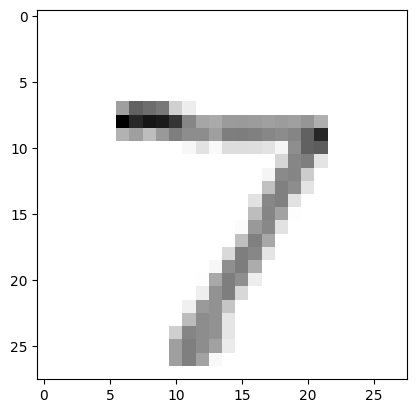

In [12]:
print(predictions[0])
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

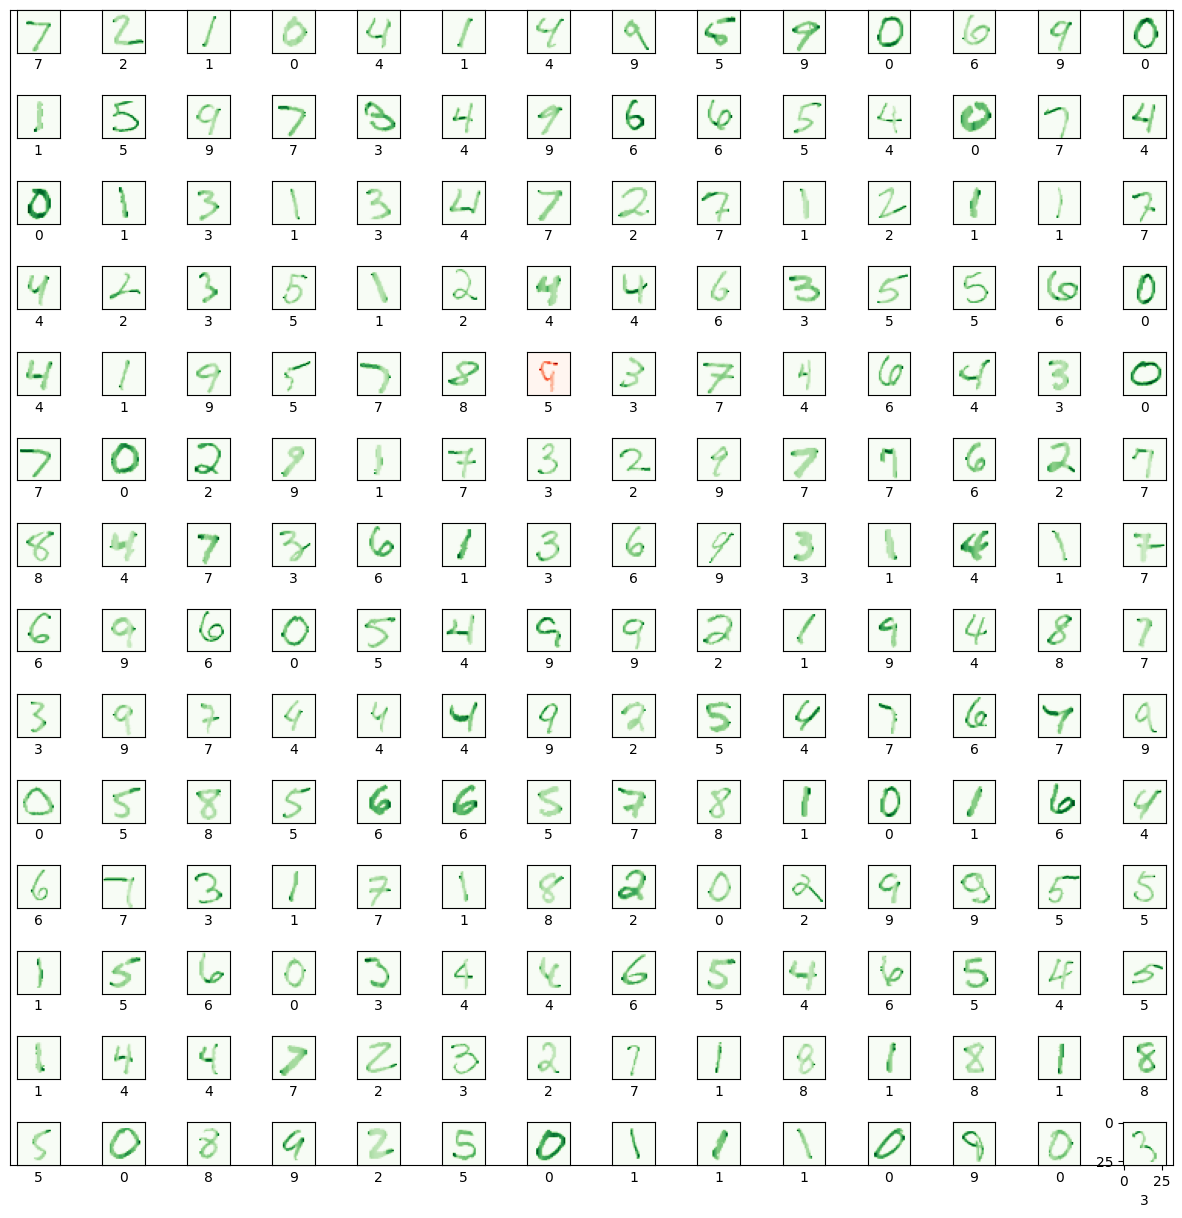

In [15]:
numbers_to_display = 196

num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()